<a href="https://colab.research.google.com/github/ashishpatel26/Covid19-Models/blob/master/Efficientnet_B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install -U efficientnet
import tensorflow as tf

In [0]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from glob import glob
from tqdm import notebook
from keras import Model
from keras.layers import Dropout, Flatten, Dense
from keras import optimizers
import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [0]:
from efficientnet.keras import EfficientNetB3
from efficientnet.keras import preprocess_input

In [0]:
train = '/content/drive/My Drive/dataset/train/'
test = '/content/drive/My Drive/dataset/test'

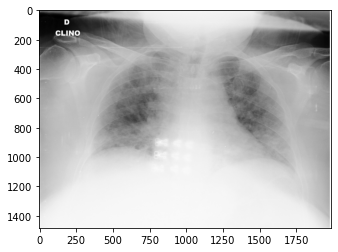

In [20]:
im = cv2.imread('/content/drive/My Drive/dataset/train/corona/01E392EE-69F9-4E33-BFCE-E5C968654078.jpg')
plt.imshow(im)

In [0]:
eff_net = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [0]:
eff_net.trainable = False

In [23]:
x = eff_net.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)
model = Model(input = eff_net.input, output = predictions)
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 40) 1080        input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 40) 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 40) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
X_train = []
y_train = []

In [0]:
class DataLoader():
  def __init__(self, path):
    self.path = path

  def preprocessing(self,instancePath):
    image = load_img(instancePath, target_size=(224, 224))
    image = img_to_array(image)
    image /= 255.0
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    return image

  def prepare_train_data(self):
    X_train = []
    y_train = []
    for class_folder_name in os.listdir(self.path):
      class_folder_path = os.path.join(self.path, class_folder_name)
      for img in notebook.tqdm(os.listdir(class_folder_path)):
        imgpath = os.path.join(class_folder_path, img)
        img = preprocessing(imgpath)
        X_train.append(img)
        y_train.append(1 if class_folder_name == 'corona' else 0)
    
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    print(f'X_train shape:{X_train.shape}\nY_train shape:{y_train.shape}')
    return X_train,y_train

In [55]:
dl = DataLoader(path = train)
X_train, y_train = dl.prepare_train_data()


X_train shape:(178, 224, 224, 3)
Y_train shape:(178,)


In [0]:
# def preprocessing(instancePath):
#     image = load_img(instancePath, target_size=(224, 224))
#     image = img_to_array(image)
#     image /= 255.0
#     image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
#     image = preprocess_input(image)
#     return image

In [0]:
# for class_folder_name in os.listdir(train):
#   class_folder_path = os.path.join(train, class_folder_name)
#   for img in notebook.tqdm(os.listdir(class_folder_path)):
#     imgpath = os.path.join(class_folder_path, img)
#     img = preprocessing(imgpath)
#     X_train.append(img)
#     y_train.append(1 if class_folder_name == 'corona' else 0)

In [0]:
# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)

In [59]:
X_train.shape,y_train.shape

((178, 224, 224, 3), (178,))

In [0]:
nb_epoch = 30
learning_rate = 0.0001
batch_size = 6
weights="/content/drive/My Drive/dataset/weightefnet3.h5"
callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]

In [43]:
%%time
# Train model
history = model.fit(X_train , y_train, batch_size=batch_size,epochs=nb_epoch,validation_split=0.1,verbose=1, callbacks=callbacks)
# history = model.fit(X_train, y_train, 
#                     steps_per_epoch=len(X_train)/batch_size,
#                     validation_steps=len(X_train*0.1)/batch_size,
#                     validation_split= 0.1,
#                     callbacks=callbacks,
#                     epochs = epochs)

Train on 160 samples, validate on 18 samples
Epoch 1/30
160/160 [==============================] - 14s 85ms/step - loss: 0.1971 - accuracy: 0.9812 - val_loss: 9.7653 - val_accuracy: 0.0000e+00
Epoch 2/30
160/160 [==============================] - 14s 88ms/step - loss: 0.0943 - accuracy: 0.9688 - val_loss: 7.0603 - val_accuracy: 0.0000e+00
Epoch 3/30
160/160 [==============================] - 14s 89ms/step - loss: 0.1494 - accuracy: 0.9625 - val_loss: 16.2997 - val_accuracy: 0.0000e+00
Epoch 4/30
160/160 [==============================] - 14s 85ms/step - loss: 0.0530 - accuracy: 0.9875 - val_loss: 20.4649 - val_accuracy: 0.0000e+00
Epoch 5/30
160/160 [==============================] - 14s 84ms/step - loss: 0.0417 - accuracy: 0.9812 - val_loss: 13.5604 - val_accuracy: 0.0000e+00
Epoch 6/30
160/160 [==============================] - 14s 84ms/step - loss: 0.0299 - accuracy: 0.9812 - val_loss: 16.5849 - val_accuracy: 0.0000e+00
Epoch 7/30
160/160 [==============================] - 14s 84ms/

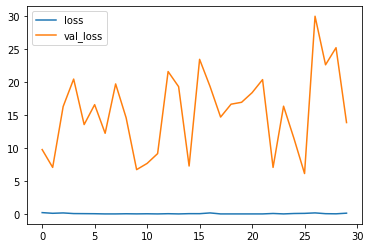

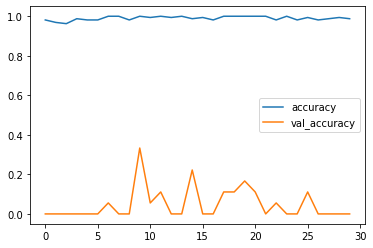

In [70]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

In [68]:
history_df

,val_loss,val_accuracy,loss,accuracy
0,9.765273,0.000000,1.970736e-01,0.98125
1,7.060269,0.000000,9.429480e-02,0.96875
2,16.299671,0.000000,1.494187e-01,0.96250
3,20.464912,0.000000,5.301030e-02,0.98750
4,13.560358,0.000000,4.168331e-02,0.98125
5,16.584934,0.000000,2.987935e-02,0.98125
6,12.236992,0.055556,3.681534e-04,1.00000
7,19.729663,0.000000,6.928378e-04,1.00000
8,14.588001,0.000000,2.403753e-02,0.98125
9,6.722253,0.333333,6.014884e-03,1.00000
